<a href="https://colab.research.google.com/github/FatiBuuloloo/Interpretable_Credit_Risk_Modeling_Using_Explainable_AI-XAI-_SHAP-mini_project_006/blob/main/credit_risk_scoring_(shap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
pip install shap

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,RobustScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import shap
import warnings
warnings.filterwarnings("ignore")

# Preparing Data

In [ ]:
url = "https://raw.githubusercontent.com/FatiBuuloloo/Interpretable_Credit_Risk_Modeling_Using_Explainable_AI-XAI-_SHAP-mini_project_006/main/dataset/credit_risk_dataset.csv"

data = pd.read_csv(url)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
for item in data.select_dtypes("object").columns:
  print(item)
  print(data[item].value_counts())
  print()

person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64



In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
data.rename(columns={"cb_person_default_on_file":"historical_default",
"cb_person_cred_hist_length":"credit_history_length"
},inplace=True)
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
data["loan_status"].value_counts()

,count
loan_status,
0,25473
1,7108


- 1 : deafult

- 0 : non default

# Preprocessing Data

<Axes: >

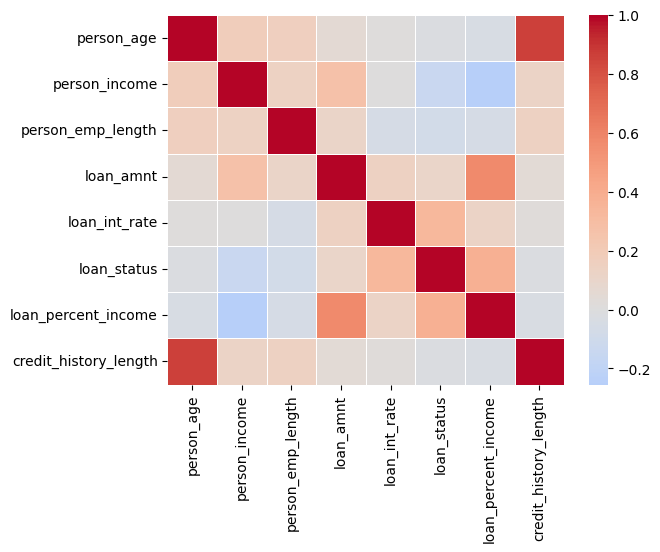

In [ ]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=False,
    mask=None,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar=True
)

Removing the Max value in columns **person_emp_length** and **person_age**

In [ ]:
data = data.drop(data[(data["person_age"]>100) | (data["person_emp_length"]>100)].index).reset_index(drop=True)
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,credit_history_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


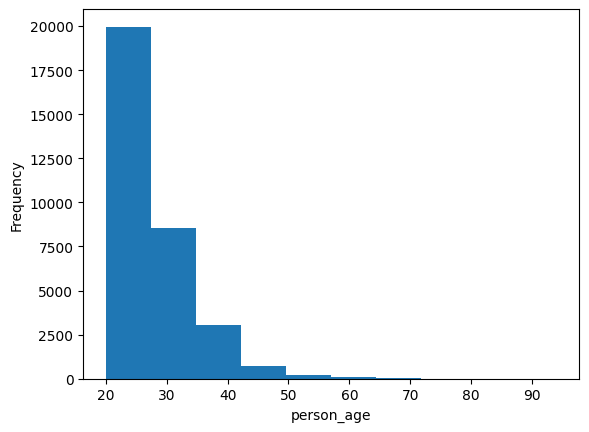

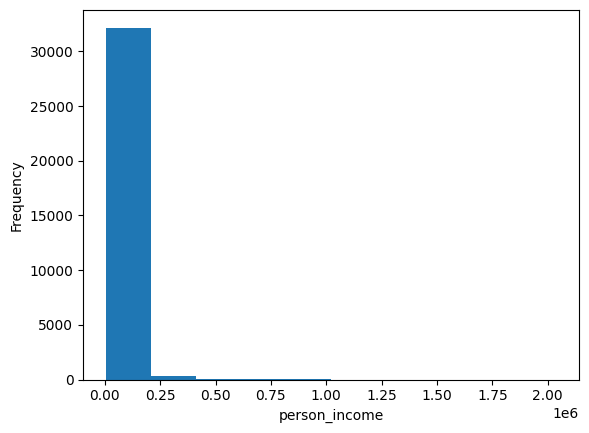

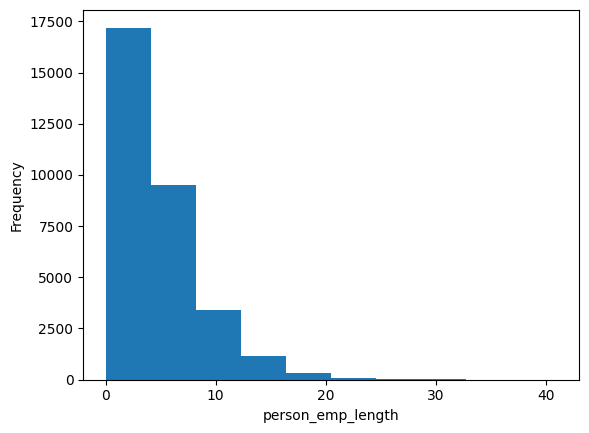

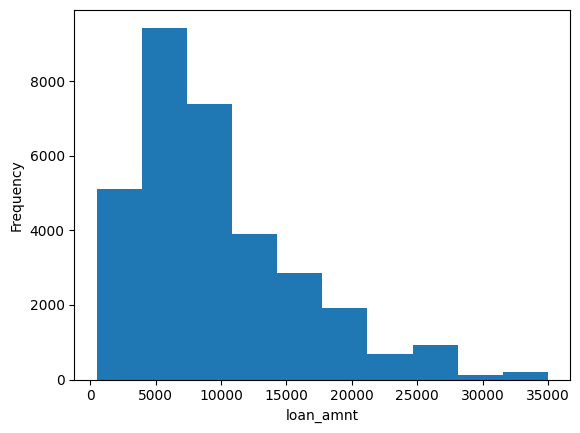

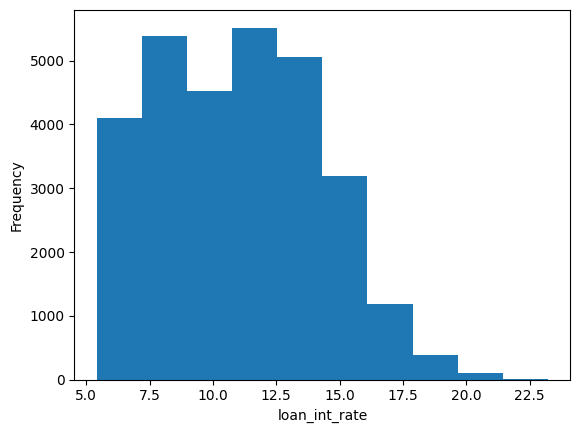

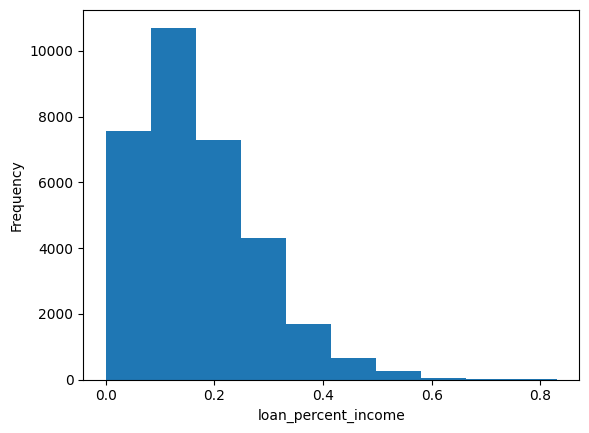

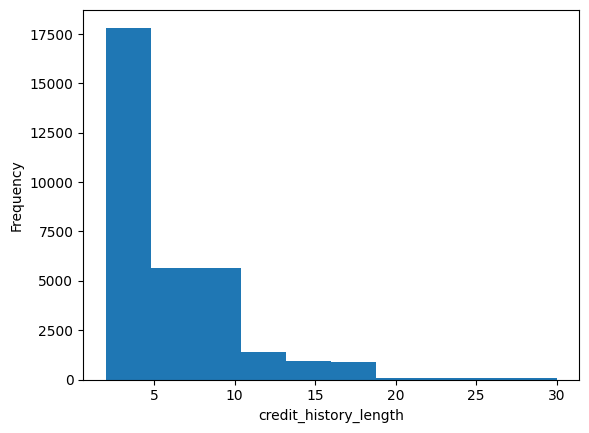

In [ ]:
numeric_cols = data.select_dtypes(include=["int64","float64"]).columns.to_list()
numeric_cols.remove("loan_status")
for item in numeric_cols:
    plt.figure()
    data[item].plot(kind="hist")
    plt.xlabel(item)
    plt.ylabel("Frequency")
    plt.show()

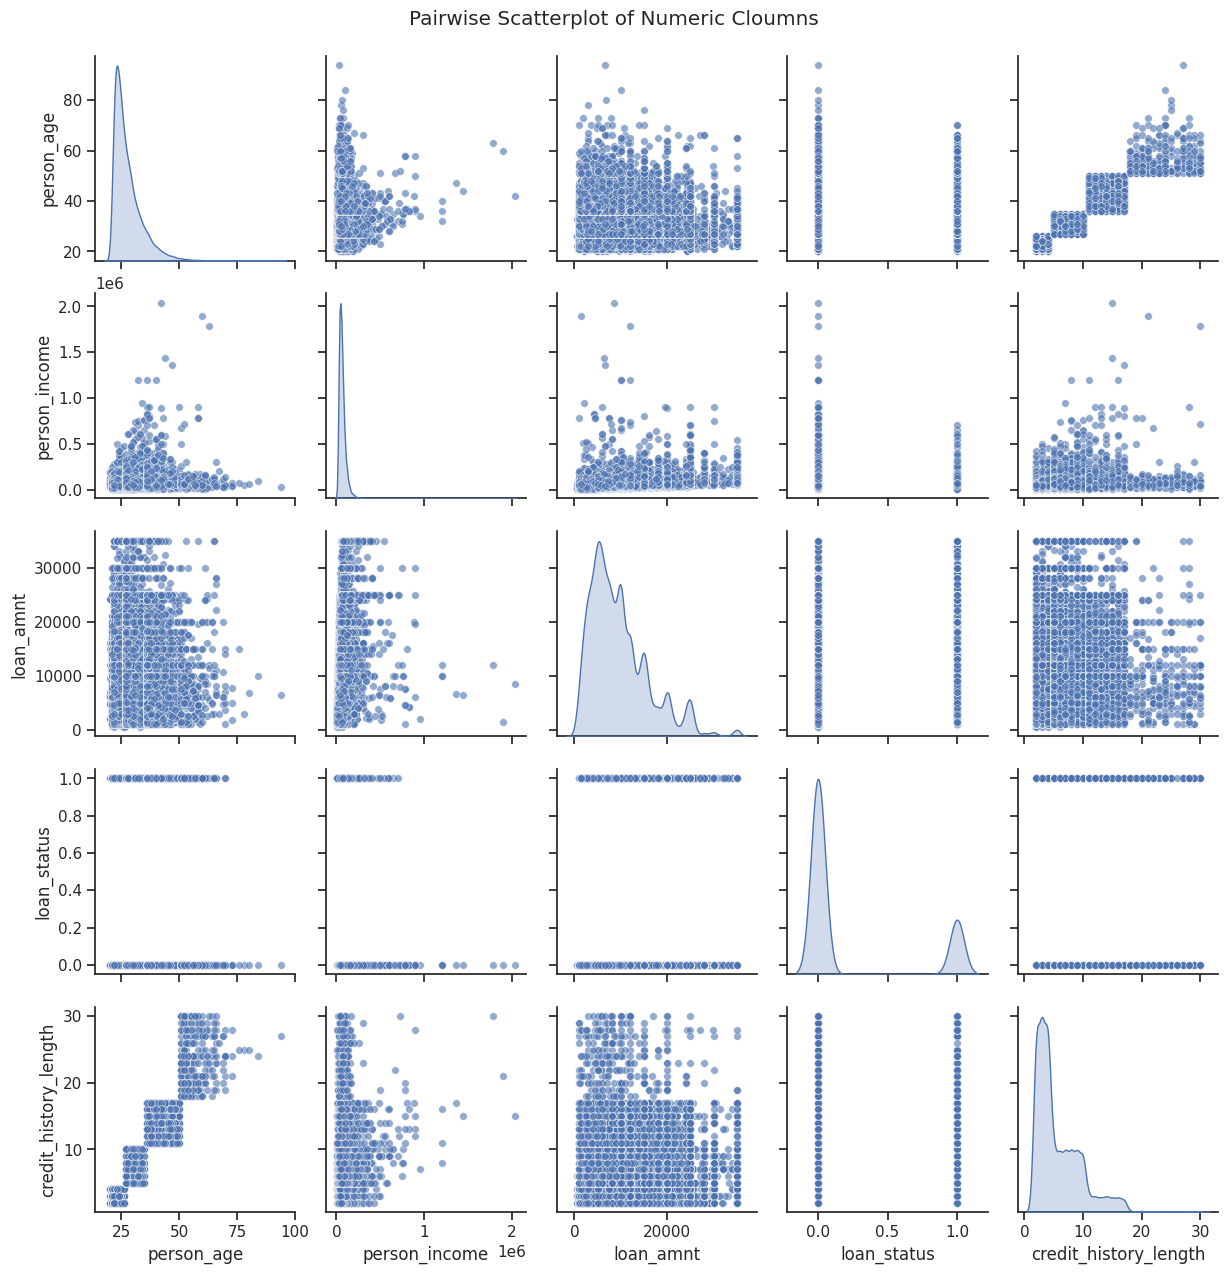

In [ ]:
sns.set_theme(style="ticks")
pair_plot = sns.pairplot(data[data.select_dtypes("int64").columns], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
pair_plot.fig.suptitle("Pairwise Scatterplot of Numeric Cloumns", y=1.02)
plt.show()

Checking outliers

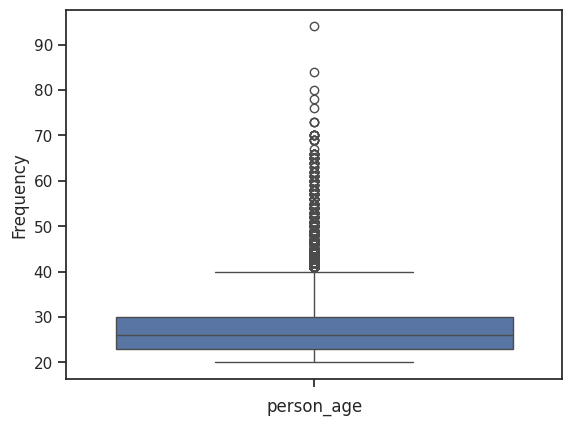

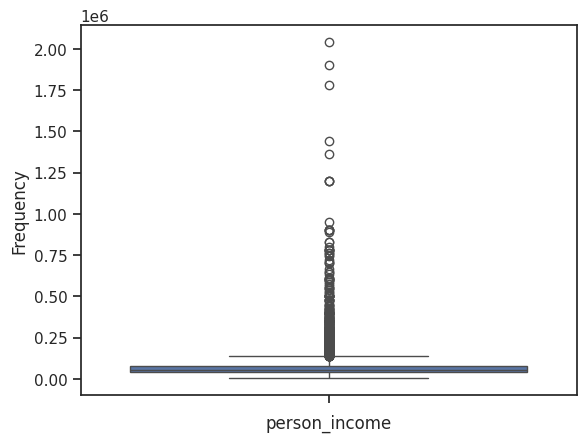

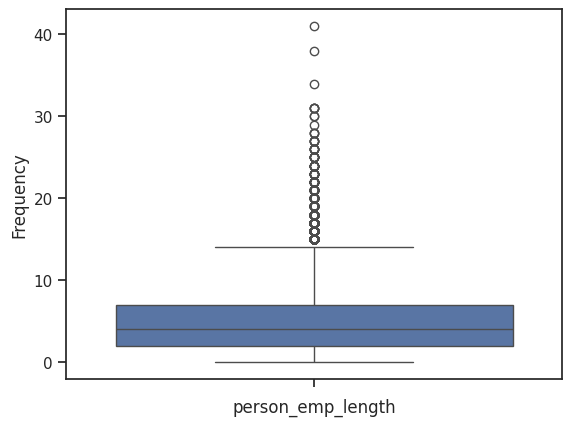

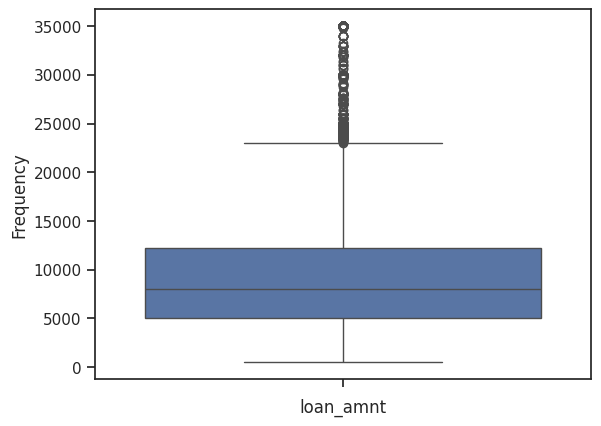

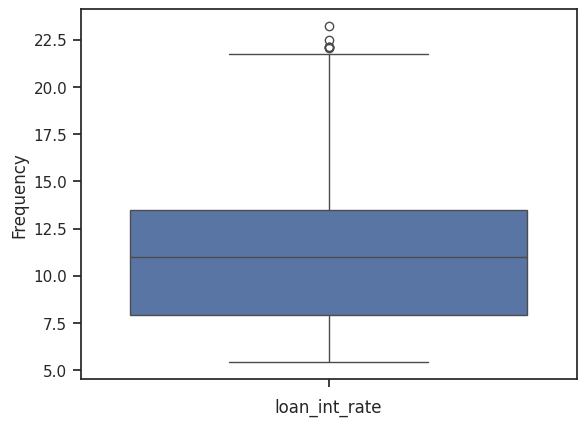

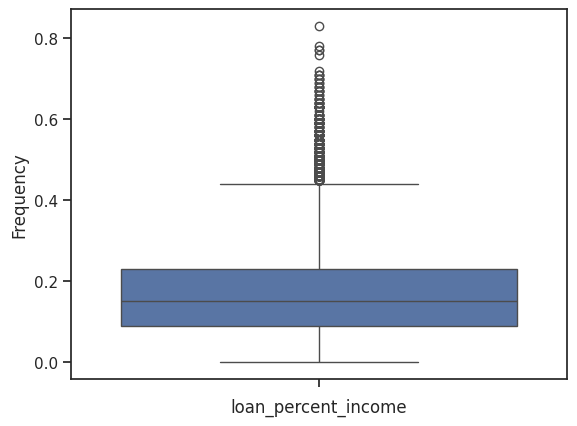

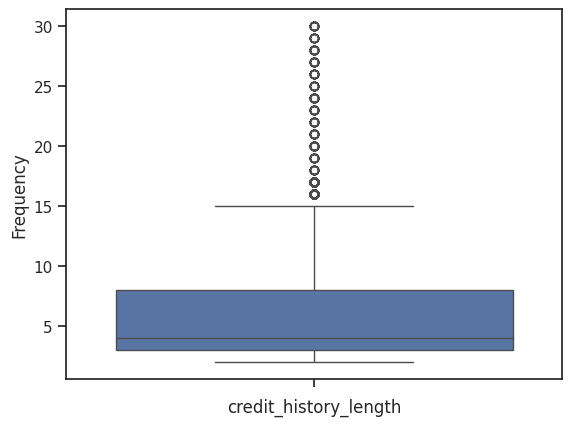

In [ ]:
for item in numeric_cols:
    plt.figure()
    sns.boxplot(data[item])
    plt.xlabel(item)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
def count_outliers(df, columns):
    outlier_report = {}
    for item in columns:
        Q1 = df[item].quantile(0.25)
        Q3 = df[item].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[item] < lower_bound) | (df[item] > upper_bound)]
        outlier_report[item] = len(outliers)

    return pd.Series(outlier_report)
num_outlier = count_outliers(data,  numeric_cols)
print("Total outliers for each column")
print(num_outlier)

Total outliers for each column
person_age               1489
person_income            1480
person_emp_length         851
loan_amnt                1688
loan_int_rate               6
loan_percent_income       650
credit_history_length    1141
dtype: int64


Transforming data using Yeo-Johnson Method

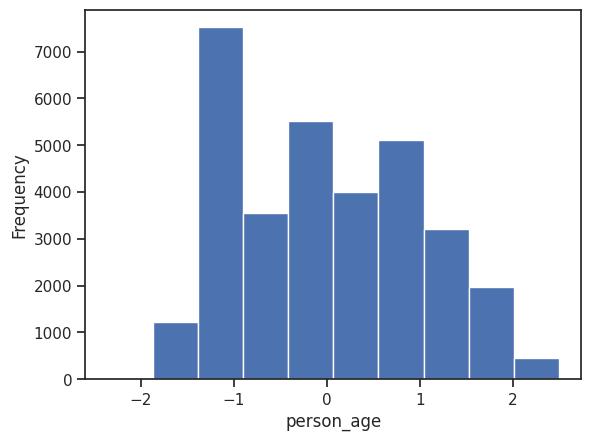

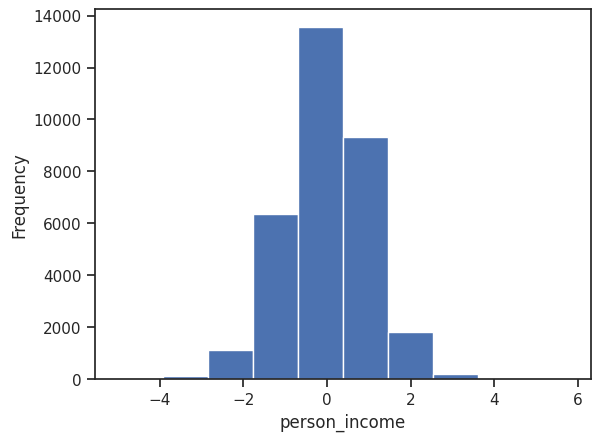

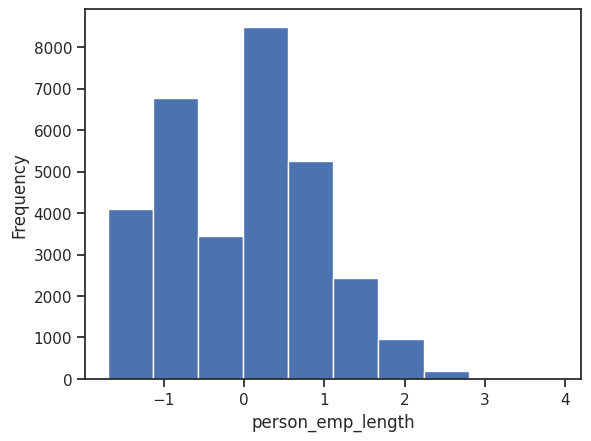

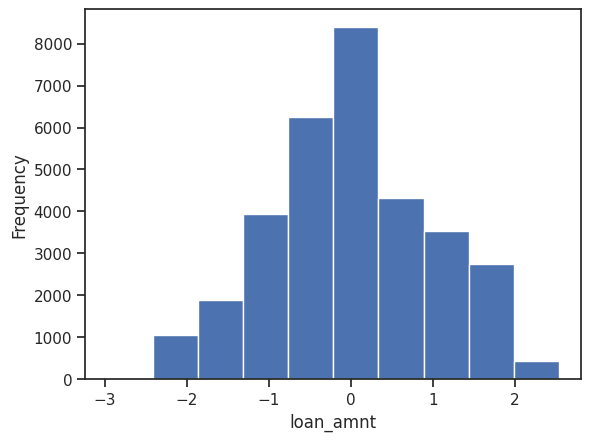

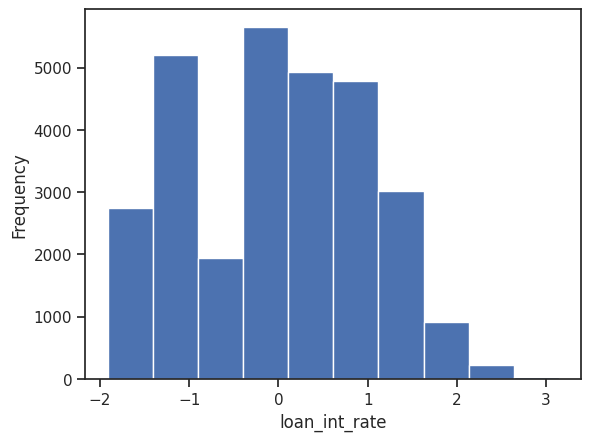

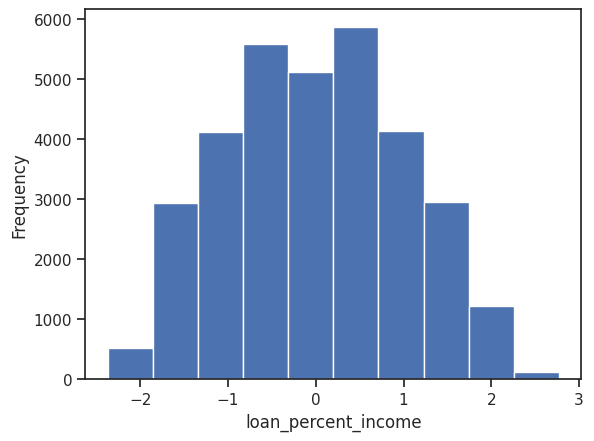

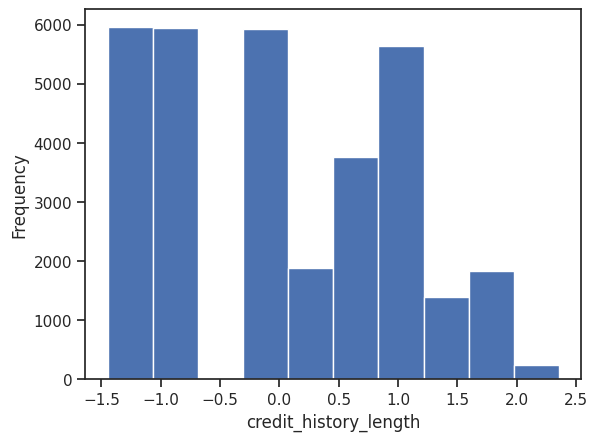

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data[numeric_cols])
data_transformed = pd.DataFrame(data_transformed, columns= numeric_cols)
for item in numeric_cols:
    plt.figure()
    plt.hist(data_transformed[item])
    plt.xlabel(item)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
num_outlier_after = count_outliers(data_transformed,numeric_cols)
print("Total outliers for each column")
print(num_outlier_after)

Total outliers for each column
person_age                 0
person_income            565
person_emp_length         42
loan_amnt                  8
loan_int_rate              0
loan_percent_income        0
credit_history_length      0
dtype: int64


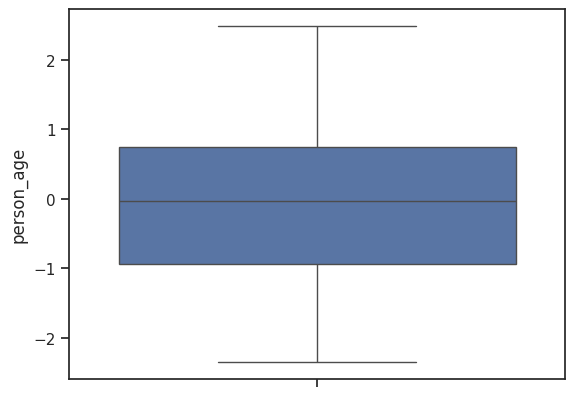

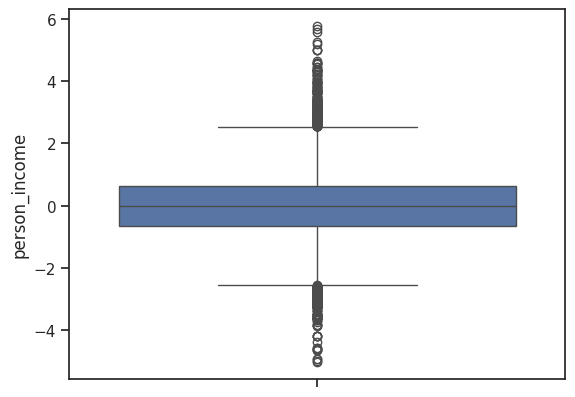

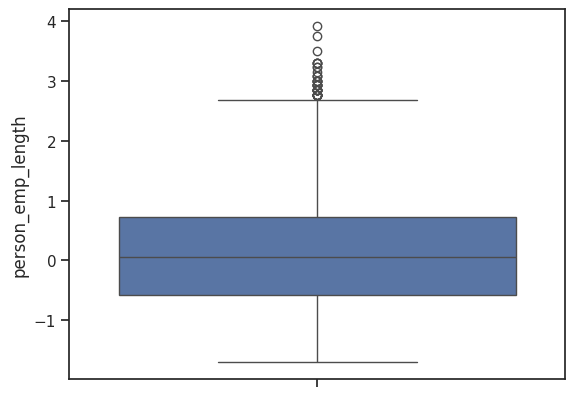

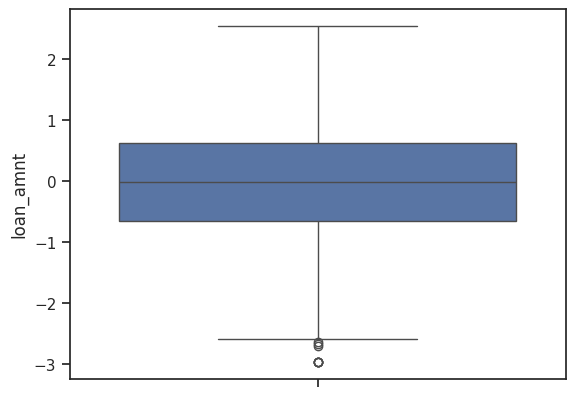

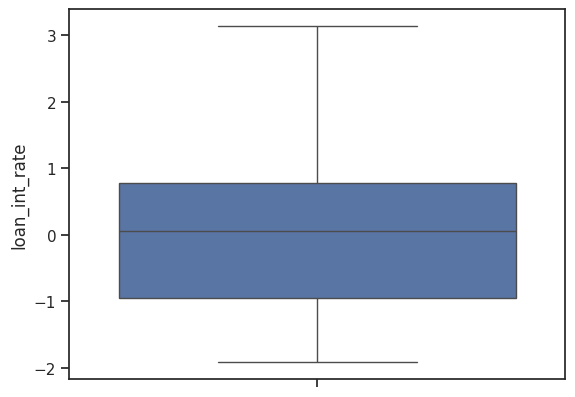

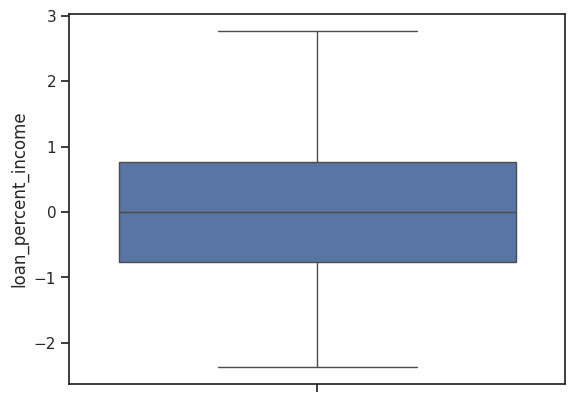

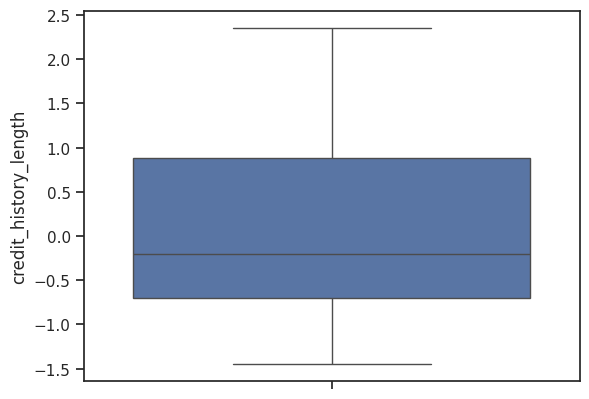

In [ ]:
for item in numeric_cols:
    plt.figure()
    sns.boxplot(data_transformed[item])
    plt.show()

Removing the outliers

In [ ]:
Q1 = data_transformed["person_income"].quantile(0.25)
Q3 = data_transformed["person_income"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
list_outlier_a = []
for idx,item in data_transformed["person_income"].items():
    if item <lower_bound or item > upper_bound:
        list_outlier_a.append(idx)
    else:
        None
len(list_outlier_a)

565

In [ ]:
Q1 = data_transformed["person_emp_length"].quantile(0.25)
Q3 = data_transformed["person_emp_length"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
list_outlier_b = []
for idx,item in data_transformed["person_emp_length"].items():
    if item <lower_bound or item > upper_bound:
        list_outlier_b.append(idx)
    else:
        None
len(list_outlier_b)

42

In [ ]:
Q1 = data_transformed["loan_amnt"].quantile(0.25)
Q3 = data_transformed["loan_amnt"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
list_outlier_c = []
for idx,item in data_transformed["loan_amnt"].items():
    if item <lower_bound or item > upper_bound:
        list_outlier_c.append(idx)
    else:
        None
len(list_outlier_c)

8

In [ ]:
list_outlier = list(set(list_outlier_a) | set(list_outlier_b) |set(list_outlier_c))
data.drop(list_outlier,inplace=True)
data.reset_index(drop=True, inplace=True)
data_transformed.drop(list_outlier,inplace=True)
data_transformed.reset_index(drop=True, inplace=True)

Handling Missing Values

In [ ]:
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,824
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3061
loan_status,0
loan_percent_income,0


imputing missing value in column **person_emp_length**

In [ ]:
data[data["person_emp_length"].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
166,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
323,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
350,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
351,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
376,22,18000,OWN,NaN,VENTURE,B,2000,11.49,0,0.11,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31684,38,30132,RENT,NaN,MEDICAL,C,3000,13.85,1,0.10,Y,14
31727,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
31758,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
31848,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


Impute missing values in **person_emp_length** using the median grouped by **person_age** and **loan_grade**

In [ ]:
median_per_group = data.groupby(["person_age", "loan_grade"])["person_emp_length"].transform("median")
data_emp_length_missing = data["person_emp_length"].copy()
data_emp_length_non_missing = data["person_emp_length"].fillna(median_per_group)
data_emp_length_non_missing.isna().sum()

np.int64(2)

Check the distribution before and after imputing the missing values

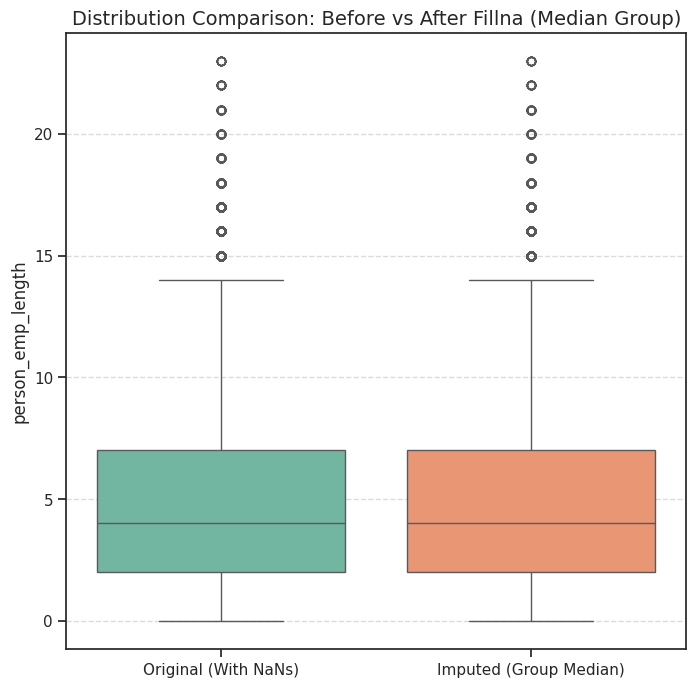

In [ ]:
plot_data = pd.DataFrame({
    'Original (With NaNs)': data_emp_length_missing,
    'Imputed (Group Median)': data_emp_length_non_missing
})

plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_data, palette="Set2", orient='v')

plt.title('Distribution Comparison: Before vs After Fillna (Median Group)', fontsize=14)
plt.ylabel('person_emp_length', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

imputing missing value in column **person_emp_length** has successfully without shifting the distribution

In [ ]:
data["person_emp_length"] = data_emp_length_non_missing

imputing the missing value in column **loan_int_rate** using the median grouped by **loan_grade**

In [ ]:
median_per_group2 = data.groupby("loan_grade")["loan_int_rate"].transform("median")
data_loan_int_rate_missing = data["loan_int_rate"].copy()
data_loan_int_rate_non_missing = data["loan_int_rate"].fillna(median_per_group2)
data_loan_int_rate_non_missing.isna().sum()

np.int64(0)

Check the distribution

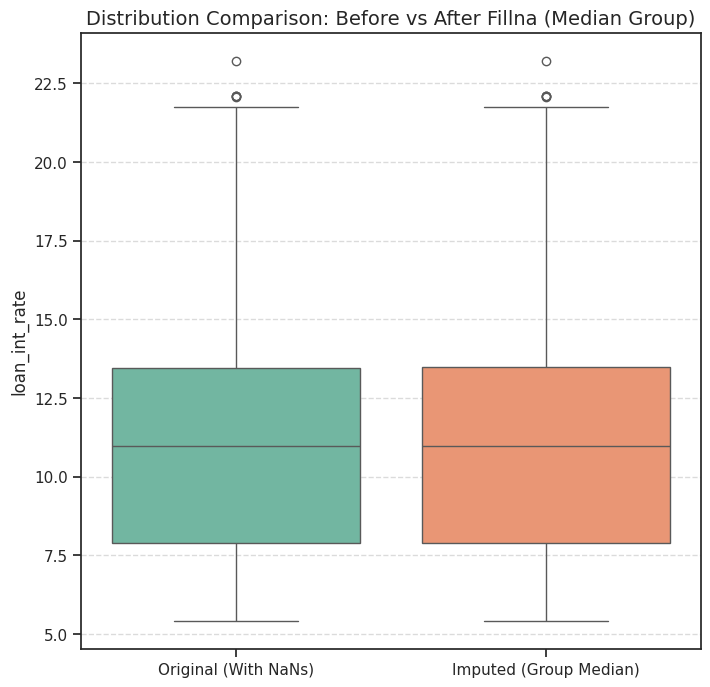

In [ ]:
plot_data2 = pd.DataFrame({
    'Original (With NaNs)': data_loan_int_rate_missing,
    'Imputed (Group Median)': data_loan_int_rate_non_missing
})

plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_data2, palette="Set2", orient='v')

plt.title('Distribution Comparison: Before vs After Fillna (Median Group)', fontsize=14)
plt.ylabel('loan_int_rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

impute missing value in column **loan_int_rate** has successfully without shifting the distribution

In [ ]:
data["loan_int_rate"] = data_loan_int_rate_non_missing

In [ ]:
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,2
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
data = data.dropna().reset_index(drop=True)
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


splitting data

In [ ]:
pt2 = PowerTransformer(method='yeo-johnson')
data_transformed_2 = pt2.fit_transform(data[numeric_cols])
data_transformed_2 = pd.DataFrame(data_transformed_2, columns= numeric_cols)

df = data.copy()
df[numeric_cols] = data_transformed_2

In [ ]:
object_cols = df.select_dtypes("object").columns
object_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'historical_default'],
      dtype='object')

In [ ]:
for item in object_cols:
    le = LabelEncoder()
    df[item] = le.fit_transform(df[item])
df_X = df.drop(columns=["loan_status"],axis=1)
df_y = df["loan_status"]
train_X, test_X, train_y, test_y = train_test_split(df_X,df_y, test_size=0.3,stratify=df_y, shuffle=True)
scaler = RobustScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 1, 1: 5})
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42, class_weight={0:0.5,1:4})
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1, class_weight={0: 1, 1: 5})
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.001, random_state=42,scale_pos_weight=5)
xgb_model = XGBClassifier(n_estimators=100, max_depth=6,learning_rate=0.01, random_state=42,use_label_encoder=False,eval_metric='logloss',scale_pos_weight=5)
cb_model = CatBoostClassifier(iterations=100,learning_rate=0.01,depth=8,random_state=42,verbose=100,class_weights={0:1,1:4})
model_brf = BalancedRandomForestClassifier(n_estimators=100, sampling_strategy='auto')


models ={
"Logistic Regression" :lr_model,
"SVM" : svm_model,
"KNN" : knn_model,
"Random Forest" :rf_model,
"Naive Bayes" : nb_model,
"LightGBM" : lgbm_model,
"XGBoost" : xgb_model,
"CatBoost" : cb_model,
"Balanced Random Forest":model_brf
}

In [ ]:
def training_test(name_model):
  if name_model == "TabNet":
    models[name_model].fit(X_train=train_X_scaled, y_train=train_y, weights=1)
    y_pred = models[name_model].predict(test_X_scaled)
    y_pred_proba = models[name_model].predict_proba(test_X_scaled)[:, 1]
    auc_score = roc_auc_score(test_y, y_pred_proba)
    gini_score = 2 * auc_score - 1
    print(f"AUROC Score: {auc_score:.4f}")
    print(f"Gini Coefficient: {gini_score:.4f}")
    print(classification_report(test_y, y_pred))
  else:
    models[name_model].fit(train_X_scaled, train_y)
    y_pred_proba = models[name_model].predict_proba(test_X_scaled)[:, 1]
    y_pred = models[name_model].predict(test_X_scaled)
    auc_score = roc_auc_score(test_y, y_pred_proba)
    gini_score = 2 * auc_score - 1
    print(f"AUROC Score: {auc_score:.4f}")
    print(f"Gini Coefficient: {gini_score:.4f}")
    print(classification_report(test_y, y_pred))

for item in models:
    print(f"{item} Model")
    training_test(item)
    print()

Logistic Regression Model
AUROC Score: 0.8417
Gini Coefficient: 0.6835
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      7545
           1       0.43      0.83      0.56      2043

    accuracy                           0.73      9588
   macro avg       0.68      0.76      0.68      9588
weighted avg       0.83      0.73      0.75      9588


SVM Model
AUROC Score: 0.8929
Gini Coefficient: 0.7859
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7545
           1       0.44      0.89      0.59      2043

    accuracy                           0.74      9588
   macro avg       0.70      0.79      0.70      9588
weighted avg       0.85      0.74      0.76      9588


KNN Model
AUROC Score: 0.8452
Gini Coefficient: 0.6904
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7545
           1       0.75      0.55      0.64      2043


In [ ]:
def test_model (name_model, threshold):
  model_prediction=models[name_model].predict_proba(test_X_scaled)[:,1]
  model_prediction = np.where(model_prediction > threshold,1,0)
  auc_score = roc_auc_score(test_y, model_prediction)
  gini_score = 2 * auc_score - 1

  print(f"AUROC Score: {auc_score:.4f}")
  print(f"Gini Coefficient: {gini_score:.4f}")
  print(classification_report(test_y,model_prediction))

for item in models:
  print(f"{item} Model")
  test_model(item,0.6)
  print()

Logistic Regression Model
AUROC Score: 0.7693
Gini Coefficient: 0.5387
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      7545
           1       0.49      0.75      0.59      2043

    accuracy                           0.78      9588
   macro avg       0.71      0.77      0.72      9588
weighted avg       0.83      0.78      0.80      9588


SVM Model
AUROC Score: 0.7187
Gini Coefficient: 0.4373
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7545
           1       0.82      0.46      0.59      2043

    accuracy                           0.86      9588
   macro avg       0.85      0.72      0.76      9588
weighted avg       0.86      0.86      0.85      9588


KNN Model
AUROC Score: 0.7304
Gini Coefficient: 0.4607
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7545
           1       0.81      0.49      0.61      2043


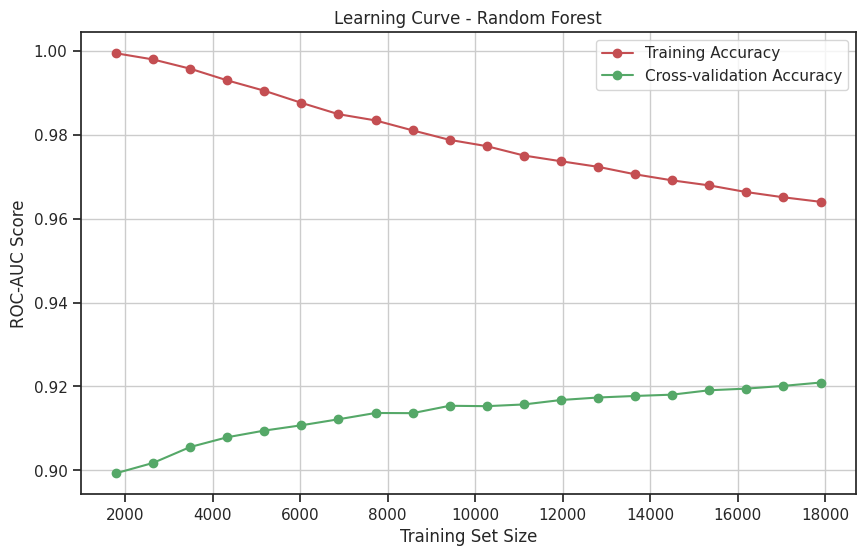

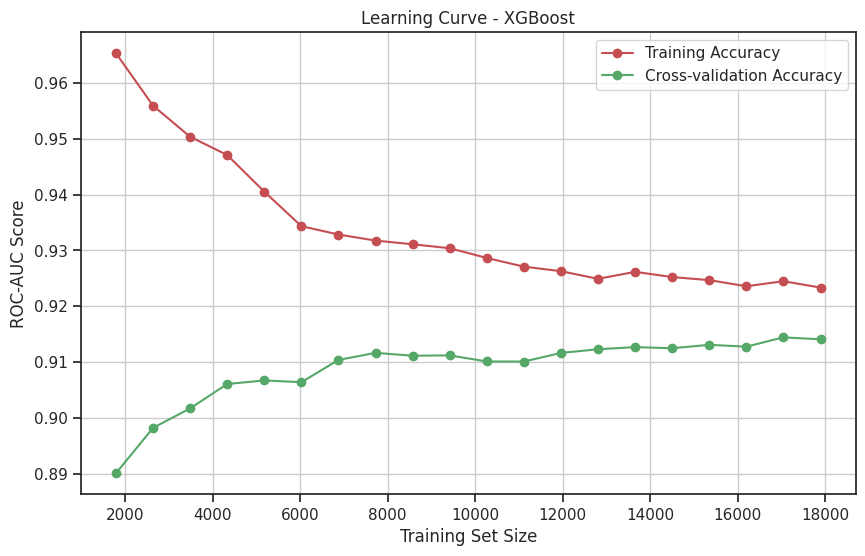

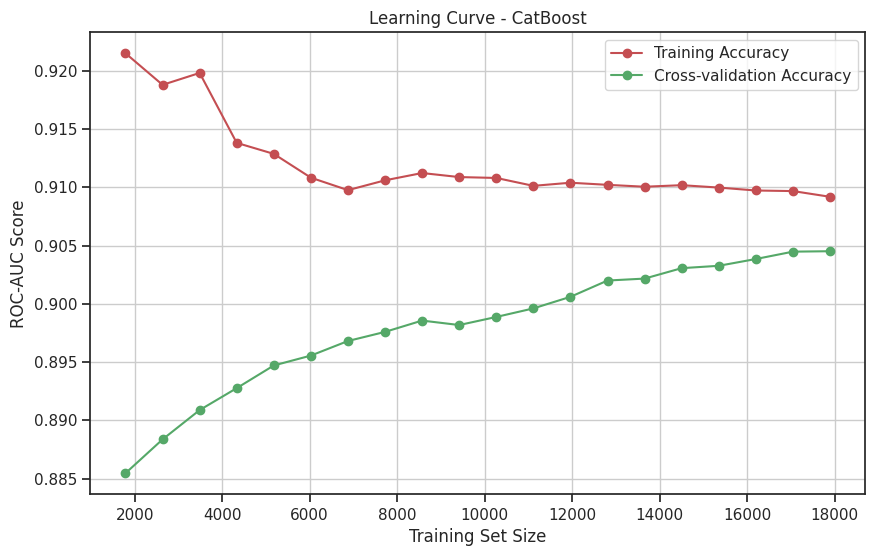

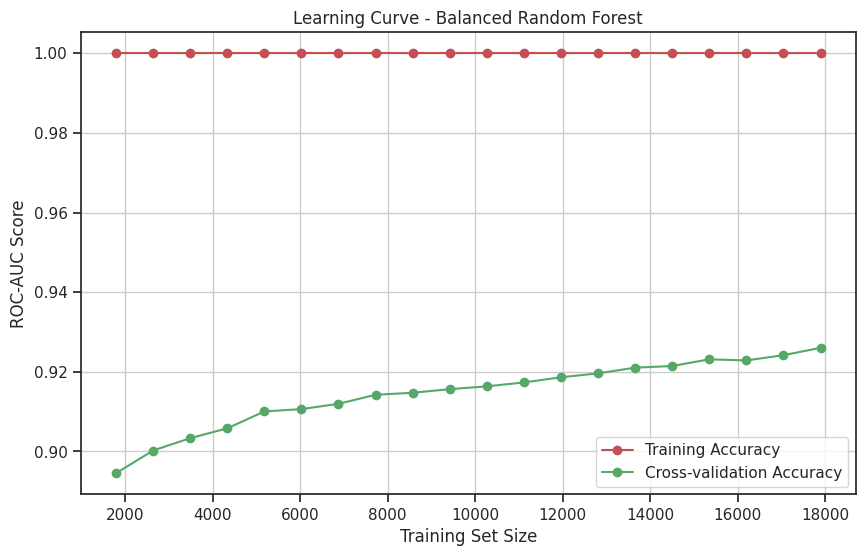

In [ ]:
check_model = ["Random Forest","XGBoost","CatBoost","Balanced Random Forest"]
for item in check_model:
    model = models[item]
    train_sizes = np.linspace(0.1, 1.0, 20)
    train_sizes, train_scores, val_scores = learning_curve(
        model, train_X_scaled, train_y,
        cv=5, scoring='roc_auc',
        train_sizes=train_sizes,
        n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation Accuracy")
    plt.title(f"Learning Curve - {item}")
    plt.xlabel("Training Set Size")
    plt.ylabel("ROC-AUC Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Scoring

In [ ]:
final_model = models["XGBoost"]
pred = final_model.predict_proba(test_X_scaled)[:,1]
data_scoring = pd.concat([test_X, test_y],axis=1)
data_scoring["Score"]=pred
data_scoring.sort_values(by="Score",inplace=True,ascending=False)
data_scoring["Decile_Group"] = pd.qcut(data_scoring["Score"],q=10,labels=range(10,0,-1))
data_scoring

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,historical_default,credit_history_length,loan_status,Score,Decile_Group
363,-0.932259,0.123481,3,0.307938,0,4,1.816306,2.369210,1.817770,1,-1.444571,1,0.844542,1
23,-0.932259,0.493387,3,-0.247066,0,3,2.252582,1.291389,1.858711,0,-0.193224,1,0.844542,1
17722,1.031867,0.280276,3,1.424149,0,3,1.894398,1.262472,1.731518,0,0.180564,1,0.844542,1
17263,-1.337007,-1.894158,3,0.743797,0,3,-0.024242,1.665901,1.686082,1,-0.193224,1,0.844542,1
23564,0.215620,-1.398753,3,0.536902,0,3,0.311719,1.372337,1.639018,0,0.470744,1,0.844542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,-1.337007,-0.548048,2,0.307938,5,1,1.476634,0.106076,2.077278,0,-0.193224,0,0.201203,10
29198,1.428913,-0.835262,2,1.424149,5,0,0.969744,-0.961632,1.858711,0,1.432448,0,0.201203,10
21702,0.600295,-0.120552,2,-1.714756,5,1,1.080461,0.066092,1.318181,0,0.897828,0,0.201203,10
13552,-1.809316,-1.004755,2,0.307938,5,1,0.599769,0.215640,1.590253,0,-0.193224,0,0.201203,10


In [ ]:
data_scoring["loan_status"].value_counts()

,count
loan_status,
0,7545
1,2043


In [ ]:
list_item ={}
for i in range(1,11):
    num_failed = int(data_scoring[data_scoring["Decile_Group"]==i]["loan_status"].value_counts().get(1,0))
    num_non_failed = int(data_scoring[data_scoring["Decile_Group"]==i]["loan_status"].value_counts().get(0,0))
    list_item[i] = [num_failed,num_non_failed]

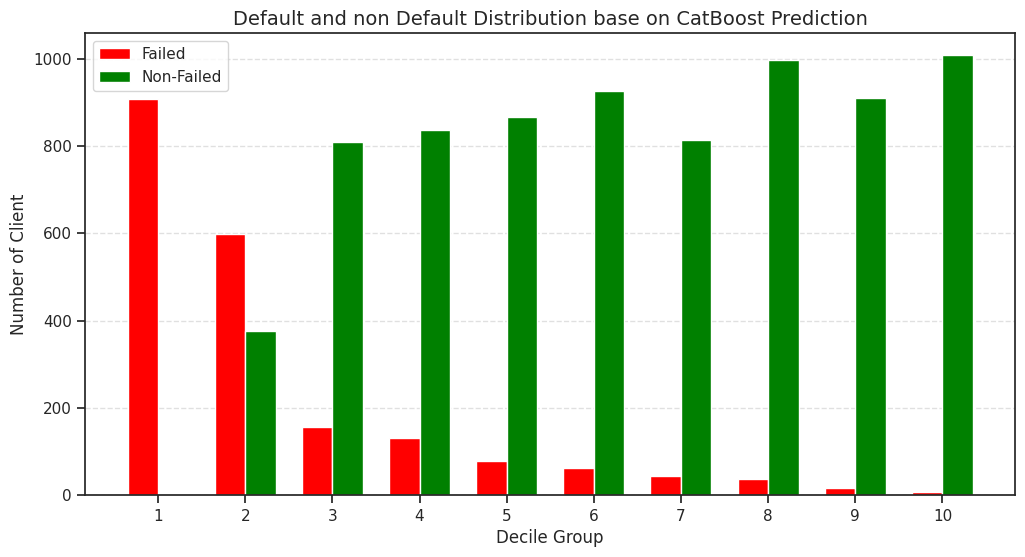

In [ ]:
labels = list(list_item.keys())
failed_values = [v[0] for v in list_item.values()]
non_failed_values = [v[1] for v in list_item.values()]

plt.figure(figsize=(12, 6))
width = 0.35
x = range(len(labels))
plt.bar([i - width/2 for i in x], failed_values, width, label='Failed', color='red')
plt.bar([i + width/2 for i in x], non_failed_values, width, label='Non-Failed', color='green')
plt.title('Default and non Default Distribution base on CatBoost Prediction', fontsize=14)
plt.xlabel('Decile Group', fontsize=12)
plt.ylabel('Number of Client', fontsize=12)
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

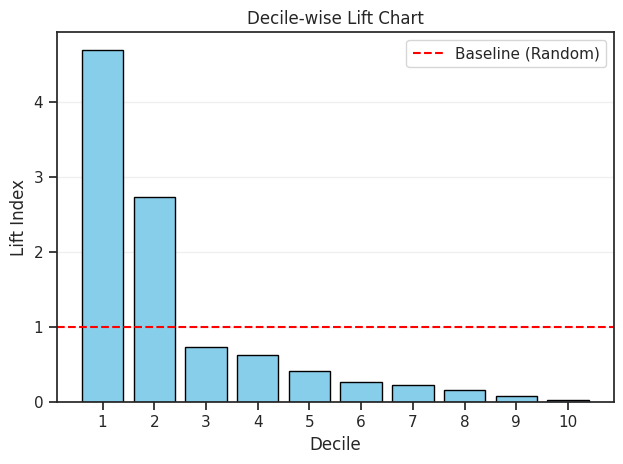

In [ ]:
def lift_chart(y_true, y_probs):
    df_lift = pd.DataFrame({'target': y_true, 'prob': y_probs})
    df_lift = df_lift.sort_values(by='prob', ascending=False).reset_index(drop=True)
    df_lift['decile'] = pd.qcut(df_lift.index, 10, labels=np.arange(1, 11))
    overall_rate = df_lift['target'].mean()
    lift_per_decile = df_lift.groupby('decile')['target'].mean() / overall_rate

    plt.bar(lift_per_decile.index.astype(str), lift_per_decile.values, color='skyblue', edgecolor='black')
    plt.axhline(y=1, color='red', linestyle='--', label='Baseline (Random)')
    plt.title(f'Decile-wise Lift Chart')
    plt.xlabel('Decile')
    plt.ylabel('Lift Index')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

y_probs = final_model.predict_proba(test_X_scaled)[:, 1]
lift_chart(test_y, y_probs)

# SHAP

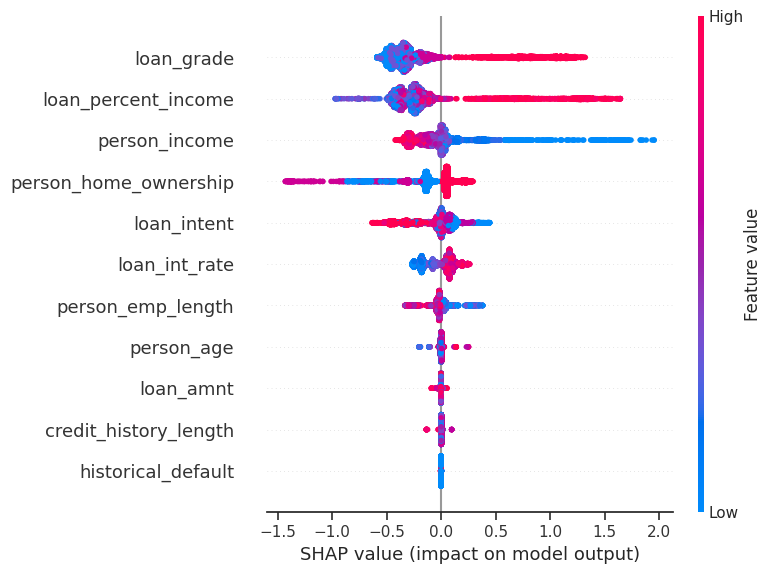

In [ ]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(test_X_scaled)
shap.summary_plot(shap_values, test_X_scaled, feature_names=df_X.columns)

In [ ]:
data_scoring_1 = pd.concat([test_X, test_y],axis=1)
data_scoring_1.reset_index(drop=True,inplace=True)
list_index_1 = data_scoring_1[data_scoring_1["loan_status"]==1].index.to_list()
np.random.choice(list_index_1)

np.int64(7756)

Testing 5 Clients

In [ ]:
reason_map = {
    'loan_percent_income': "Loan amount is too high compared to your income.",
    'loan_grade': "Your credit grade does not meet our minimum requirements.",
    'person_income': "Income level is insufficient for this loan profile.",
    'historical_default': "Records of past payment issues were detected.",
    'person_home_ownership': "Residential ownership status does not meet risk criteria.",
    'person_emp_length': "Employment stability or length is below the minimum.",
    'credit_history_length': "Credit history is too short for a reliable assessment.",
    'loan_int_rate': "Interest rate risk exceeds our policy limits."
}
def rejection_reasons(shap_values_row, feature_names):
    top_indices = np.argsort(shap_values_row)[::-1]

    reasons = []
    for item in top_indices:
        feature_name = feature_names[item]
        if shap_values_row[item] > 0 and feature_name in reason_map:
            reasons.append(reason_map[feature_name])
        if len(reasons) >= 3:
            break
    return reasons

1st Client

In [62]:
shap.initjs()
index_to_test = np.random.choice(list_index_1)
one_person_prediction = final_model.predict_proba(scaler.transform([test_X.iloc[index_to_test,:]]))[:,1]
print(f"XGBoost Prediction: {one_person_prediction}")
shap.force_plot(explainer.expected_value, shap_values[index_to_test,:], test_X.iloc[index_to_test,:])

XGBoost Prediction: [0.84386927]


In [63]:
if one_person_prediction>0.6:
    reasons = rejection_reasons(shap_values[index_to_test], test_X.columns)
    print("Credit Rejected!")
    print("Reason")
    for i, msg in enumerate(reasons, 1):
        print(f"{i}. {msg}")
else:
    print("Credit Accepted")

Credit Rejected!
Reason
1. Loan amount is too high compared to your income.
2. Residential ownership status does not meet risk criteria.
3. Income level is insufficient for this loan profile.


2nd Client

In [64]:
shap.initjs()
index_to_test = np.random.choice(list_index_1)
one_person_prediction = final_model.predict_proba(scaler.transform([test_X.iloc[index_to_test,:]]))[:,1]
print(f"XGBoost Prediction: {one_person_prediction}")
shap.force_plot(explainer.expected_value, shap_values[index_to_test,:], test_X.iloc[index_to_test,:])

XGBoost Prediction: [0.84386927]


In [65]:
if one_person_prediction>0.6:
    reasons = rejection_reasons(shap_values[index_to_test], test_X.columns)
    print("Credit Rejected!")
    print("Reason")
    for i, msg in enumerate(reasons, 1):
        print(f"{i}. {msg}")
else:
    print("Credit Accepted")

Credit Rejected!
Reason
1. Loan amount is too high compared to your income.
2. Residential ownership status does not meet risk criteria.
3. Interest rate risk exceeds our policy limits.


3rd Client

In [66]:
shap.initjs()
index_to_test = np.random.choice(list_index_1)
one_person_prediction = final_model.predict_proba(scaler.transform([test_X.iloc[index_to_test,:]]))[:,1]
print(f"XGBoost Prediction: {one_person_prediction}")
shap.force_plot(explainer.expected_value, shap_values[index_to_test,:], test_X.iloc[index_to_test,:])

XGBoost Prediction: [0.84386927]


In [67]:
if one_person_prediction>0.6:
    reasons = rejection_reasons(shap_values[index_to_test], test_X.columns)
    print("Credit Rejected!")
    print("Reason")
    for i, msg in enumerate(reasons, 1):
        print(f"{i}. {msg}")
else:
    print("Credit Accepted")

Credit Rejected!
Reason
1. Loan amount is too high compared to your income.
2. Residential ownership status does not meet risk criteria.
3. Interest rate risk exceeds our policy limits.


4th Client

In [68]:
shap.initjs()
index_to_test = np.random.choice(list_index_1)
one_person_prediction = final_model.predict_proba(scaler.transform([test_X.iloc[index_to_test,:]]))[:,1]
print(f"XGBoost Prediction: {one_person_prediction}")
shap.force_plot(explainer.expected_value, shap_values[index_to_test,:], test_X.iloc[index_to_test,:])

XGBoost Prediction: [0.43852133]


In [69]:
if one_person_prediction>0.6:
    reasons = rejection_reasons(shap_values[index_to_test], test_X.columns)
    print("Credit Rejected!")
    print("Reason")
    for i, msg in enumerate(reasons, 1):
        print(f"{i}. {msg}")
else:
    print("Credit Accepted")

Credit Accepted


5th Client

In [70]:
shap.initjs()
index_to_test = np.random.choice(list_index_1)
one_person_prediction = final_model.predict_proba(scaler.transform([test_X.iloc[index_to_test,:]]))[:,1]
print(f"XGBoost Prediction: {one_person_prediction}")
shap.force_plot(explainer.expected_value, shap_values[index_to_test,:], test_X.iloc[index_to_test,:])

XGBoost Prediction: [0.60788494]


In [71]:
if one_person_prediction>0.6:
    reasons = rejection_reasons(shap_values[index_to_test], test_X.columns)
    print("Credit Rejected!")
    print("Reason")
    for i, msg in enumerate(reasons, 1):
        print(f"{i}. {msg}")
else:
    print("Credit Accepted")

Credit Rejected!
Reason
1. Your credit grade does not meet our minimum requirements.
2. Residential ownership status does not meet risk criteria.
3. Interest rate risk exceeds our policy limits.
